# Data Cleaning part II

After gathering and combining the tweets, it was important to remove null values in order to create a VADER-based sentiment analysis for data exploration.

In [4]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
pd.read_csv('depressive_unigram_tweets_final.csv')

/tmp/ipykernel_213131/2256732049.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('depressive_unigram_tweets_final.csv')


,Unnamed: 0.1,id,time,tweet,hashtags,cashtags,Unnamed: 0
0,0,1151315262748205057,19:18:43,Listen!! IM SORRY!! With her elder spirits g...,[],[],NaN
1,1,1151315254615400448,19:18:41,Im so pissed and depressed at the same time,[],[],NaN
2,2,1151315222692429825,19:18:34,"I’m just a hot mess that’s stressed, depressed...",[],[],NaN
3,3,1151315218011549696,19:18:33,Chen's probably depressed too since she's no l...,[],[],NaN
4,4,1151315209413386240,19:18:30,"Do you like it when I shake it for ya, daddy? ...",[],[],NaN
...,...,...,...,...,...,...,...
2914643,246104,1152367589030391809,17:00:17,えっ？！オニィ結構なお歳……（今知った） 変な声でちゃった(笑),[],[],NaN
2914644,246105,1152367565483761664,17:00:12,"#PhysicianFriday ""Let's empower doctors to tak...","['#physicianfriday', '#suicide', '#physicians'...",[],NaN
2914645,246106,1152367519283367936,17:00:01,A spike in suicides among teenage boys in the ...,"['#aztrauma', '#traumatraining', '#suicide', '...",[],NaN
2914646,246107,1152367516083204096,17:00:00,Need some support? Check out the following res...,[],[],NaN


In [6]:
import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to /home/sriram/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sriram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df2 = pd.read_csv('depressive_unigram_tweets_final.csv')

/tmp/ipykernel_213131/115653107.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('depressive_unigram_tweets_final.csv')


In [8]:
df2.head()

,Unnamed: 0.1,id,time,tweet,hashtags,cashtags,Unnamed: 0
0,0,1151315262748205057,19:18:43,Listen!! IM SORRY!! With her elder spirits g...,[],[],NaN
1,1,1151315254615400448,19:18:41,Im so pissed and depressed at the same time,[],[],NaN
2,2,1151315222692429825,19:18:34,"I’m just a hot mess that’s stressed, depressed...",[],[],NaN
3,3,1151315218011549696,19:18:33,Chen's probably depressed too since she's no l...,[],[],NaN
4,4,1151315209413386240,19:18:30,"Do you like it when I shake it for ya, daddy? ...",[],[],NaN


In [9]:
df2.isnull().any().any()  

True

In [10]:
df2.info(null_counts=True) 

/tmp/ipykernel_213131/1459351641.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df2.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2914648 entries, 0 to 2914647
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Unnamed: 0.1  2914648 non-null  object
 1   id            1664579 non-null  object
 2   time          1664579 non-null  object
 3   tweet         1664554 non-null  object
 4   hashtags      245135 non-null   object
 5   cashtags      245135 non-null   object
 6   Unnamed: 0    135497 non-null   object
dtypes: object(7)
memory usage: 155.7+ MB


In [11]:
df_new = df2[df2['tweet'].notnull()]

In [12]:
df_new.info(null_counts=True)

/tmp/ipykernel_213131/2955472245.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_new.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664554 entries, 0 to 2914647
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Unnamed: 0.1  1664554 non-null  object
 1   id            1664554 non-null  object
 2   time          1664554 non-null  object
 3   tweet         1664554 non-null  object
 4   hashtags      245135 non-null   object
 5   cashtags      245135 non-null   object
 6   Unnamed: 0    135474 non-null   object
dtypes: object(7)
memory usage: 101.6+ MB


In [13]:
df_new.isnull().any().any() 

True

In [14]:
df_new['clean_tweet'] = df_new['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords])) 

/tmp/ipykernel_213131/315687825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['clean_tweet'] = df_new['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))


In [15]:
df_new.head()

,Unnamed: 0.1,id,time,tweet,hashtags,cashtags,Unnamed: 0,clean_tweet
0,0,1151315262748205057,19:18:43,Listen!! IM SORRY!! With her elder spirits g...,[],[],NaN,Listen!! IM SORRY!! With elder spirits gone di...
1,1,1151315254615400448,19:18:41,Im so pissed and depressed at the same time,[],[],NaN,Im pissed depressed time
2,2,1151315222692429825,19:18:34,"I’m just a hot mess that’s stressed, depressed...",[],[],NaN,"I’m hot mess that’s stressed, depressed, poorl..."
3,3,1151315218011549696,19:18:33,Chen's probably depressed too since she's no l...,[],[],NaN,Chen's probably depressed since longer shikiga...
4,4,1151315209413386240,19:18:30,"Do you like it when I shake it for ya, daddy? ...",[],[],NaN,"Do like I shake ya, daddy? Move around? Let ge..."


In [16]:
df_new['vader_score'] = df_new['clean_tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

/tmp/ipykernel_213131/3414408710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['vader_score'] = df_new['clean_tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


In [17]:
df_new.head()


,Unnamed: 0.1,id,time,tweet,hashtags,cashtags,Unnamed: 0,clean_tweet,vader_score
0,0,1151315262748205057,19:18:43,Listen!! IM SORRY!! With her elder spirits g...,[],[],NaN,Listen!! IM SORRY!! With elder spirits gone di...,-0.4941
1,1,1151315254615400448,19:18:41,Im so pissed and depressed at the same time,[],[],NaN,Im pissed depressed time,-0.8176
2,2,1151315222692429825,19:18:34,"I’m just a hot mess that’s stressed, depressed...",[],[],NaN,"I’m hot mess that’s stressed, depressed, poorl...",0.0000
3,3,1151315218011549696,19:18:33,Chen's probably depressed too since she's no l...,[],[],NaN,Chen's probably depressed since longer shikiga...,-0.5106
4,4,1151315209413386240,19:18:30,"Do you like it when I shake it for ya, daddy? ...",[],[],NaN,"Do like I shake ya, daddy? Move around? Let ge...",0.3270


In [18]:
positive_num = len(df_new[df_new['vader_score'] >=0.05])
#neutral_num = len(df_new[(df_new['vaderReviewScore'] >-0.05) & (df_new['vaderReviewScore']<0.05)])
negative_num = len(df_new[df_new['vader_score']<0.05])

In [19]:
#positive_num,neutral_num, negative_num
positive_num, negative_num

(54413, 1610141)

In [20]:
df_new['vader_sentiment_label']= df_new['vader_score'].map(lambda x:int(1) if x>=0.05 else int(0))

/tmp/ipykernel_213131/2743009417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['vader_sentiment_label']= df_new['vader_score'].map(lambda x:int(1) if x>=0.05 else int(0))


In [21]:
df_new.head()

,Unnamed: 0.1,id,time,tweet,hashtags,cashtags,Unnamed: 0,clean_tweet,vader_score,vader_sentiment_label
0,0,1151315262748205057,19:18:43,Listen!! IM SORRY!! With her elder spirits g...,[],[],NaN,Listen!! IM SORRY!! With elder spirits gone di...,-0.4941,0
1,1,1151315254615400448,19:18:41,Im so pissed and depressed at the same time,[],[],NaN,Im pissed depressed time,-0.8176,0
2,2,1151315222692429825,19:18:34,"I’m just a hot mess that’s stressed, depressed...",[],[],NaN,"I’m hot mess that’s stressed, depressed, poorl...",0.0000,0
3,3,1151315218011549696,19:18:33,Chen's probably depressed too since she's no l...,[],[],NaN,Chen's probably depressed since longer shikiga...,-0.5106,0
4,4,1151315209413386240,19:18:30,"Do you like it when I shake it for ya, daddy? ...",[],[],NaN,"Do like I shake ya, daddy? Move around? Let ge...",0.3270,1


In [22]:
#df_new.loc[df_new['vaderReviewScore'] >=0.00,"vaderSentimentLabel"] = 1
#df_new.loc[df_new['vaderReviewScore']<=-0.00,"vaderSentimentLabel"] = 0

In [23]:
df_new.head()

,Unnamed: 0.1,id,time,tweet,hashtags,cashtags,Unnamed: 0,clean_tweet,vader_score,vader_sentiment_label
0,0,1151315262748205057,19:18:43,Listen!! IM SORRY!! With her elder spirits g...,[],[],NaN,Listen!! IM SORRY!! With elder spirits gone di...,-0.4941,0
1,1,1151315254615400448,19:18:41,Im so pissed and depressed at the same time,[],[],NaN,Im pissed depressed time,-0.8176,0
2,2,1151315222692429825,19:18:34,"I’m just a hot mess that’s stressed, depressed...",[],[],NaN,"I’m hot mess that’s stressed, depressed, poorl...",0.0000,0
3,3,1151315218011549696,19:18:33,Chen's probably depressed too since she's no l...,[],[],NaN,Chen's probably depressed since longer shikiga...,-0.5106,0
4,4,1151315209413386240,19:18:30,"Do you like it when I shake it for ya, daddy? ...",[],[],NaN,"Do like I shake ya, daddy? Move around? Let ge...",0.3270,1


In [24]:
df_new.drop(['Unnamed: 0.1', 'id', 'time', 'tweet', ], axis = 1, inplace = True)

/tmp/ipykernel_213131/1206106097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(['Unnamed: 0.1', 'id', 'time', 'tweet', ], axis = 1, inplace = True)


In [25]:
df_new = df_new[['Unnamed: 0', 'vader_sentiment_label', 'vader_score', 'clean_tweet']]

In [26]:
df_new.head()

,Unnamed: 0,vader_sentiment_label,vader_score,clean_tweet
0,NaN,0,-0.4941,Listen!! IM SORRY!! With elder spirits gone di...
1,NaN,0,-0.8176,Im pissed depressed time
2,NaN,0,0.0000,"I’m hot mess that’s stressed, depressed, poorl..."
3,NaN,0,-0.5106,Chen's probably depressed since longer shikiga...
4,NaN,1,0.3270,"Do like I shake ya, daddy? Move around? Let ge..."


In [27]:
positive_num = len(df_new[df_new['vader_score'] >=0.05])
neutral_num = len(df_new[(df_new['vader_score'] >-0.05) & (df_new['vader_score']<0.05)])
negative_num = len(df_new[df_new['vader_score']<=-0.05])

In [28]:
positive_num,neutral_num, negative_num

(54413, 1482516, 127625)

In [29]:
df_new.to_csv('vader_processed_final.csv')

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import nltk
from nltk.corpus import stopwords
import re
from nltk import bigrams
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [31]:
df_new['text'] = df_new['clean_tweet']

In [32]:
df_new['text']

0          Listen!! IM SORRY!! With elder spirits gone di...
1                                   Im pissed depressed time
2          I’m hot mess that’s stressed, depressed, poorl...
3          Chen's probably depressed since longer shikiga...
4          Do like I shake ya, daddy? Move around? Let ge...
                                 ...                        
2914643                     えっ？！オニィ結構なお歳……（今知った） 変な声でちゃった(笑)
2914644    #PhysicianFriday "Let's empower doctors take t...
2914645    A spike suicides among teenage boys United Sta...
2914646    Need support? Check following resources: Couns...
2914647    You improve quality life friend need. Learn Me...
Name: text, Length: 1664554, dtype: object

In [33]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [34]:
all_tweets_no_urls = [remove_url(tweet) for tweet in df_new['text']]
all_tweets_no_urls[:5]

['Listen IM SORRY With elder spirits gone didnt make sense',
 'Im pissed depressed time',
 'Im hot mess thats stressed depressed poorly dressed small breasts needing rest trying best feeling like pest',
 'Chens probably depressed since longer shikigami possessed',
 'Do like I shake ya daddy Move around Let get peep touches ground']

In [35]:
#lower_case = [word.lower() for word in df_new['text']]
sentences = df_new['text']

In [36]:
all_tweets_no_urls[0].split()

['Listen',
 'IM',
 'SORRY',
 'With',
 'elder',
 'spirits',
 'gone',
 'didnt',
 'make',
 'sense']

In [37]:
all_tweets_no_urls[0].lower().split()

['listen',
 'im',
 'sorry',
 'with',
 'elder',
 'spirits',
 'gone',
 'didnt',
 'make',
 'sense']

In [38]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['listen',
  'im',
  'sorry',
  'with',
  'elder',
  'spirits',
  'gone',
  'didnt',
  'make',
  'sense'],
 ['im', 'pissed', 'depressed', 'time']]

In [39]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('i', 75161),
 ('lonely', 55520),
 ('suicide', 39744),
 ('smile', 35717),
 ('wide', 35305),
 ('im', 33939),
 ('depressed', 26778),
 ('depression', 26510),
 ('like', 16864),
 ('people', 13264),
 ('feel', 11677),
 ('you', 11474),
 ('the', 11414),
 ('hopeless', 11236),
 ('its', 10592)]

In [40]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,i,75161
1,lonely,55520
2,suicide,39744
3,smile,35717
4,wide,35305


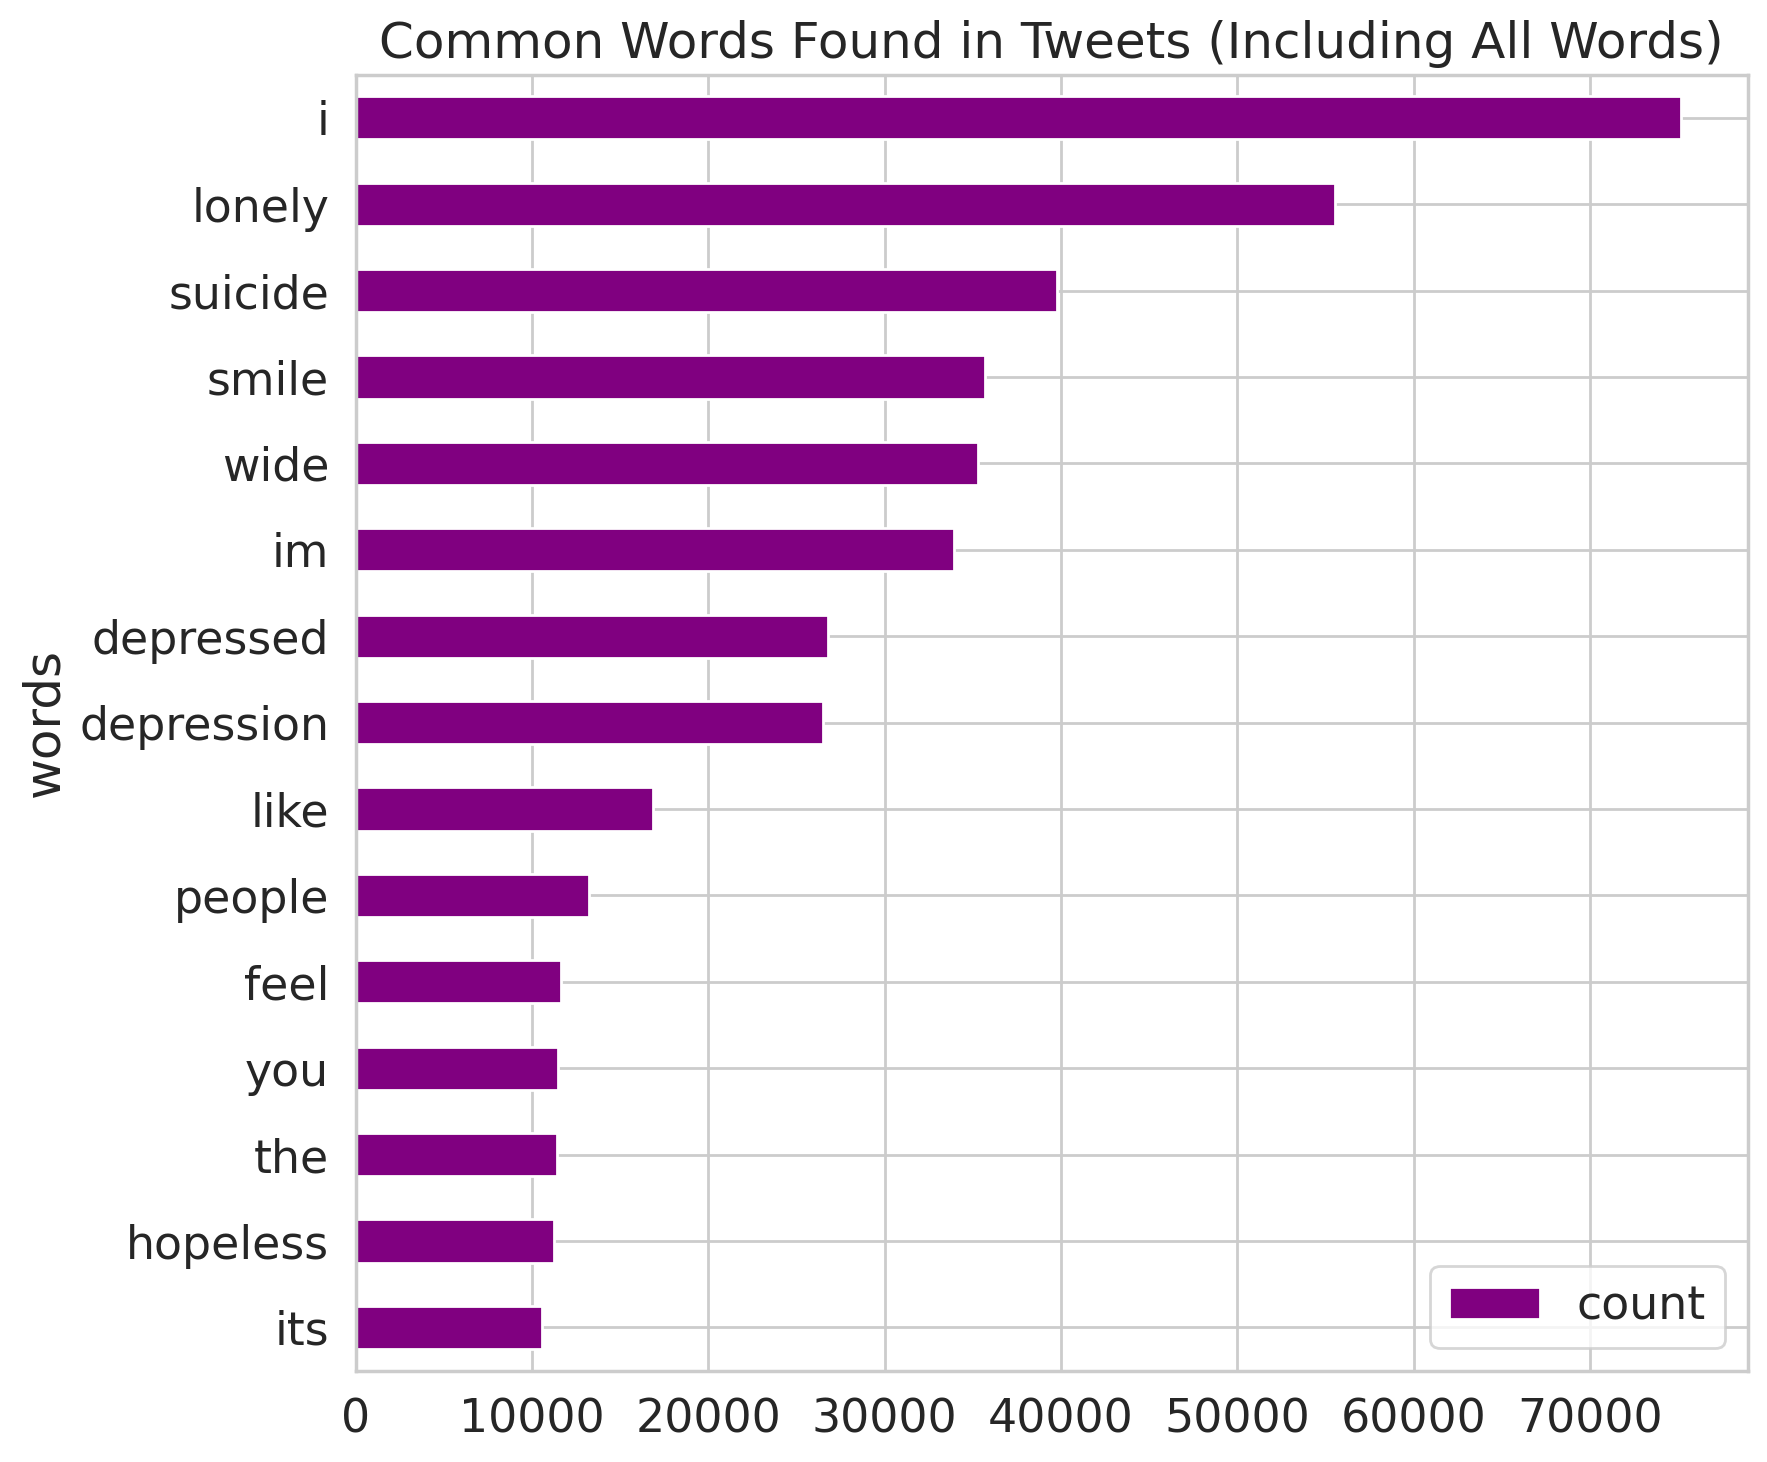

In [41]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()


In [42]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

["isn't",
 'there',
 'don',
 'doesn',
 'ain',
 'did',
 'yours',
 'if',
 'off',
 "shan't"]

In [43]:
words_in_tweet[0]


['listen',
 'im',
 'sorry',
 'with',
 'elder',
 'spirits',
 'gone',
 'didnt',
 'make',
 'sense']

In [44]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['listen', 'im', 'sorry', 'elder', 'spirits', 'gone', 'didnt', 'make', 'sense']

In [45]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('lonely', 55520),
 ('suicide', 39744),
 ('smile', 35717),
 ('wide', 35305),
 ('im', 33939),
 ('depressed', 26778),
 ('depression', 26510),
 ('like', 16864),
 ('people', 13264),
 ('feel', 11677),
 ('hopeless', 11236),
 ('get', 10485),
 ('one', 9856),
 ('dont', 8963),
 ('know', 8929)]

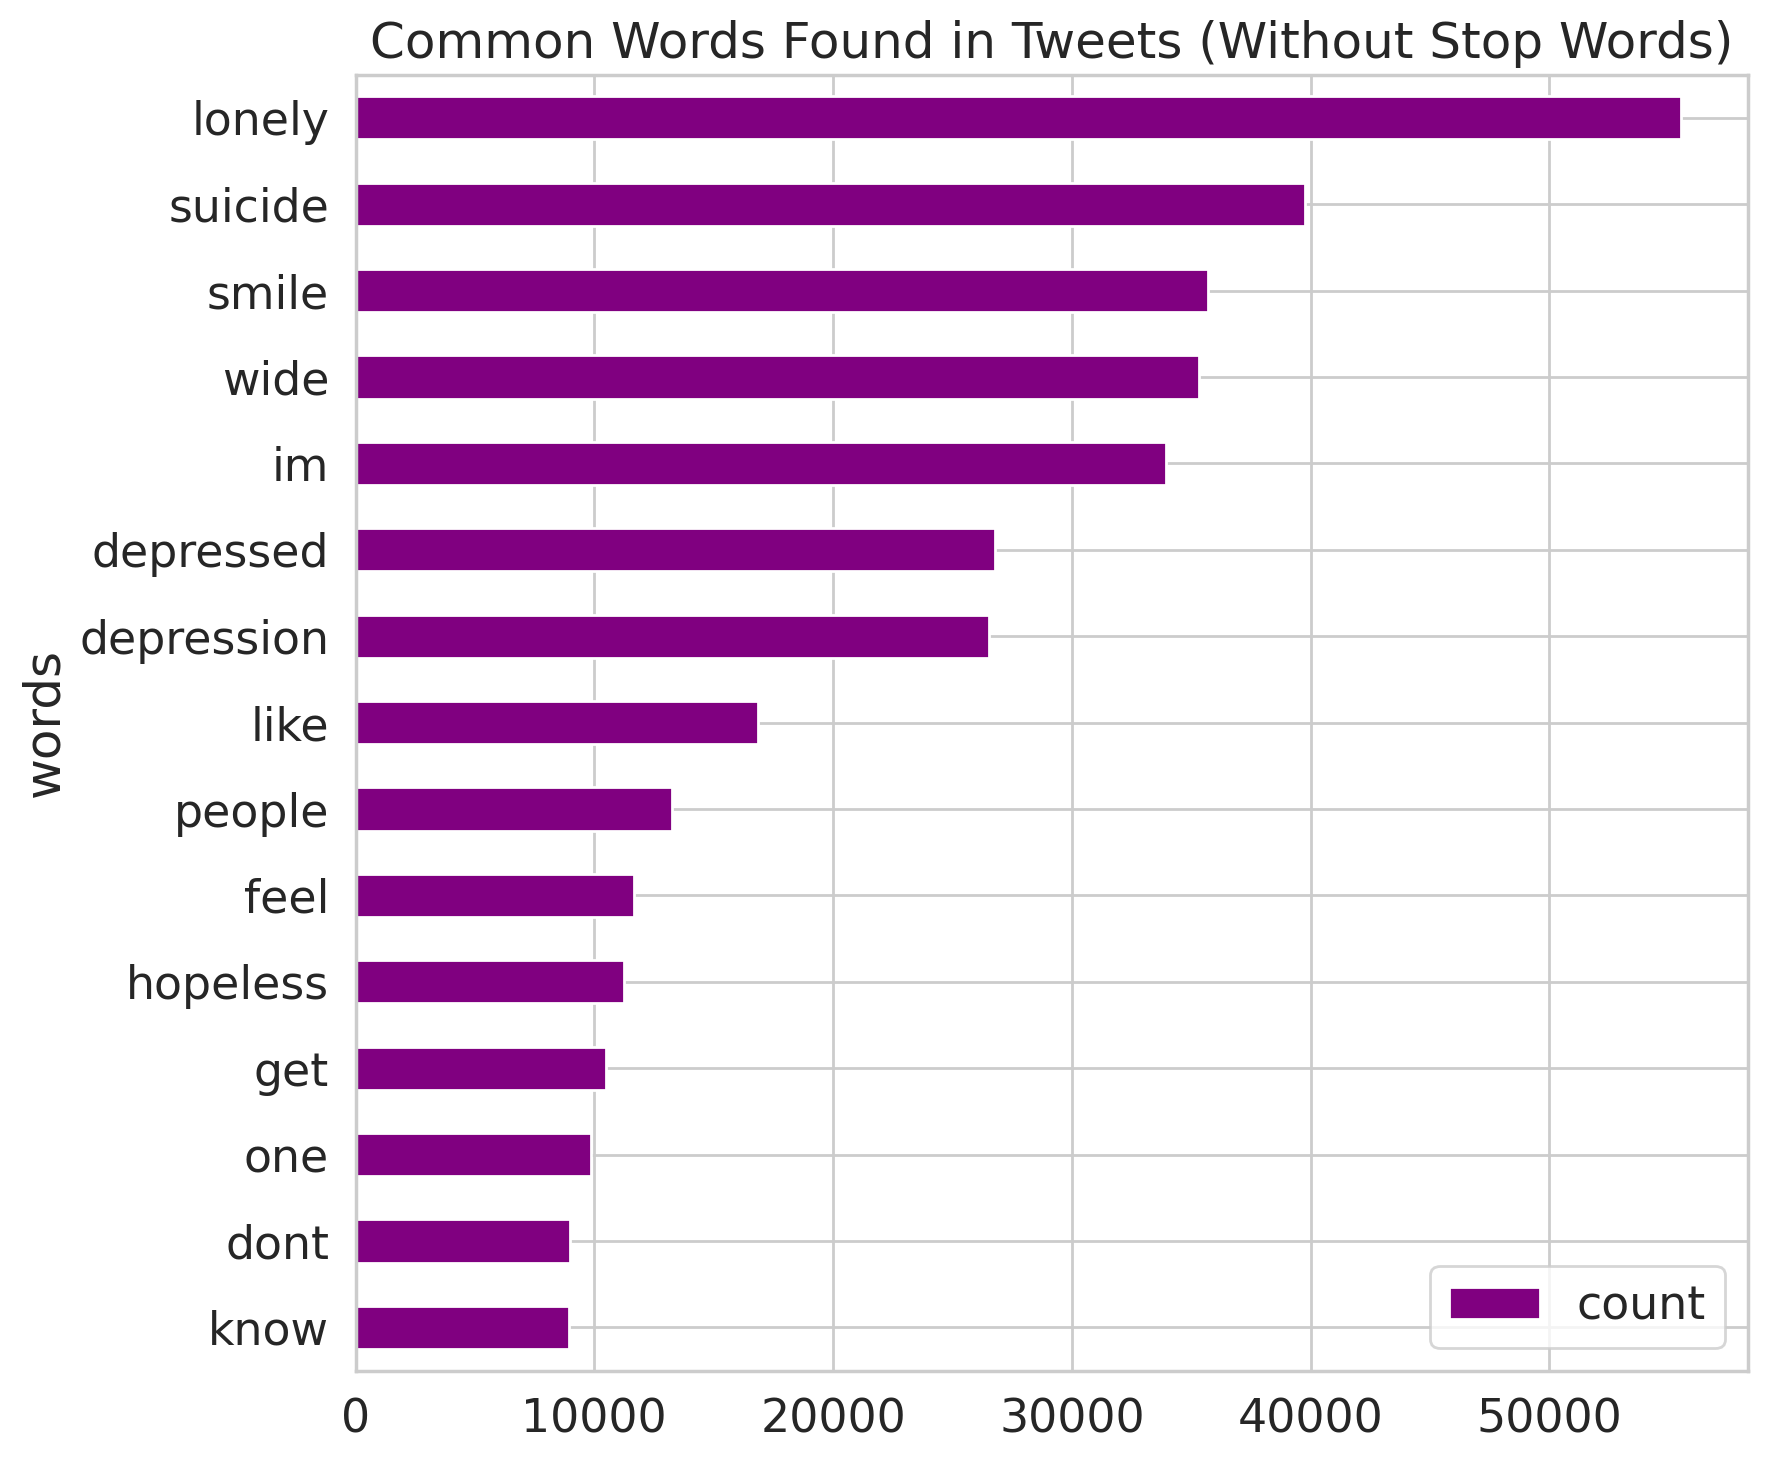

In [46]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [47]:
collection_words = ['im', 'de', 'like', 'one']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [48]:
tweets_nsw[0]


['listen', 'im', 'sorry', 'elder', 'spirits', 'gone', 'didnt', 'make', 'sense']

In [49]:
tweets_nsw_nc[0]


['listen', 'sorry', 'elder', 'spirits', 'gone', 'didnt', 'make', 'sense']

In [50]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('lonely', 55520),
 ('suicide', 39744),
 ('smile', 35717),
 ('wide', 35305),
 ('depressed', 26778),
 ('depression', 26510),
 ('people', 13264),
 ('feel', 11677),
 ('hopeless', 11236),
 ('get', 10485),
 ('dont', 8963),
 ('know', 8929),
 ('time', 8431),
 ('life', 7641),
 ('really', 7204)]

In [51]:
len(counts_nsw_nc)


125586

In [52]:
# mean(counts_nsw_nc)

In [53]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()


,words,count
0,lonely,55520
1,suicide,39744
2,smile,35717
3,wide,35305
4,depressed,26778


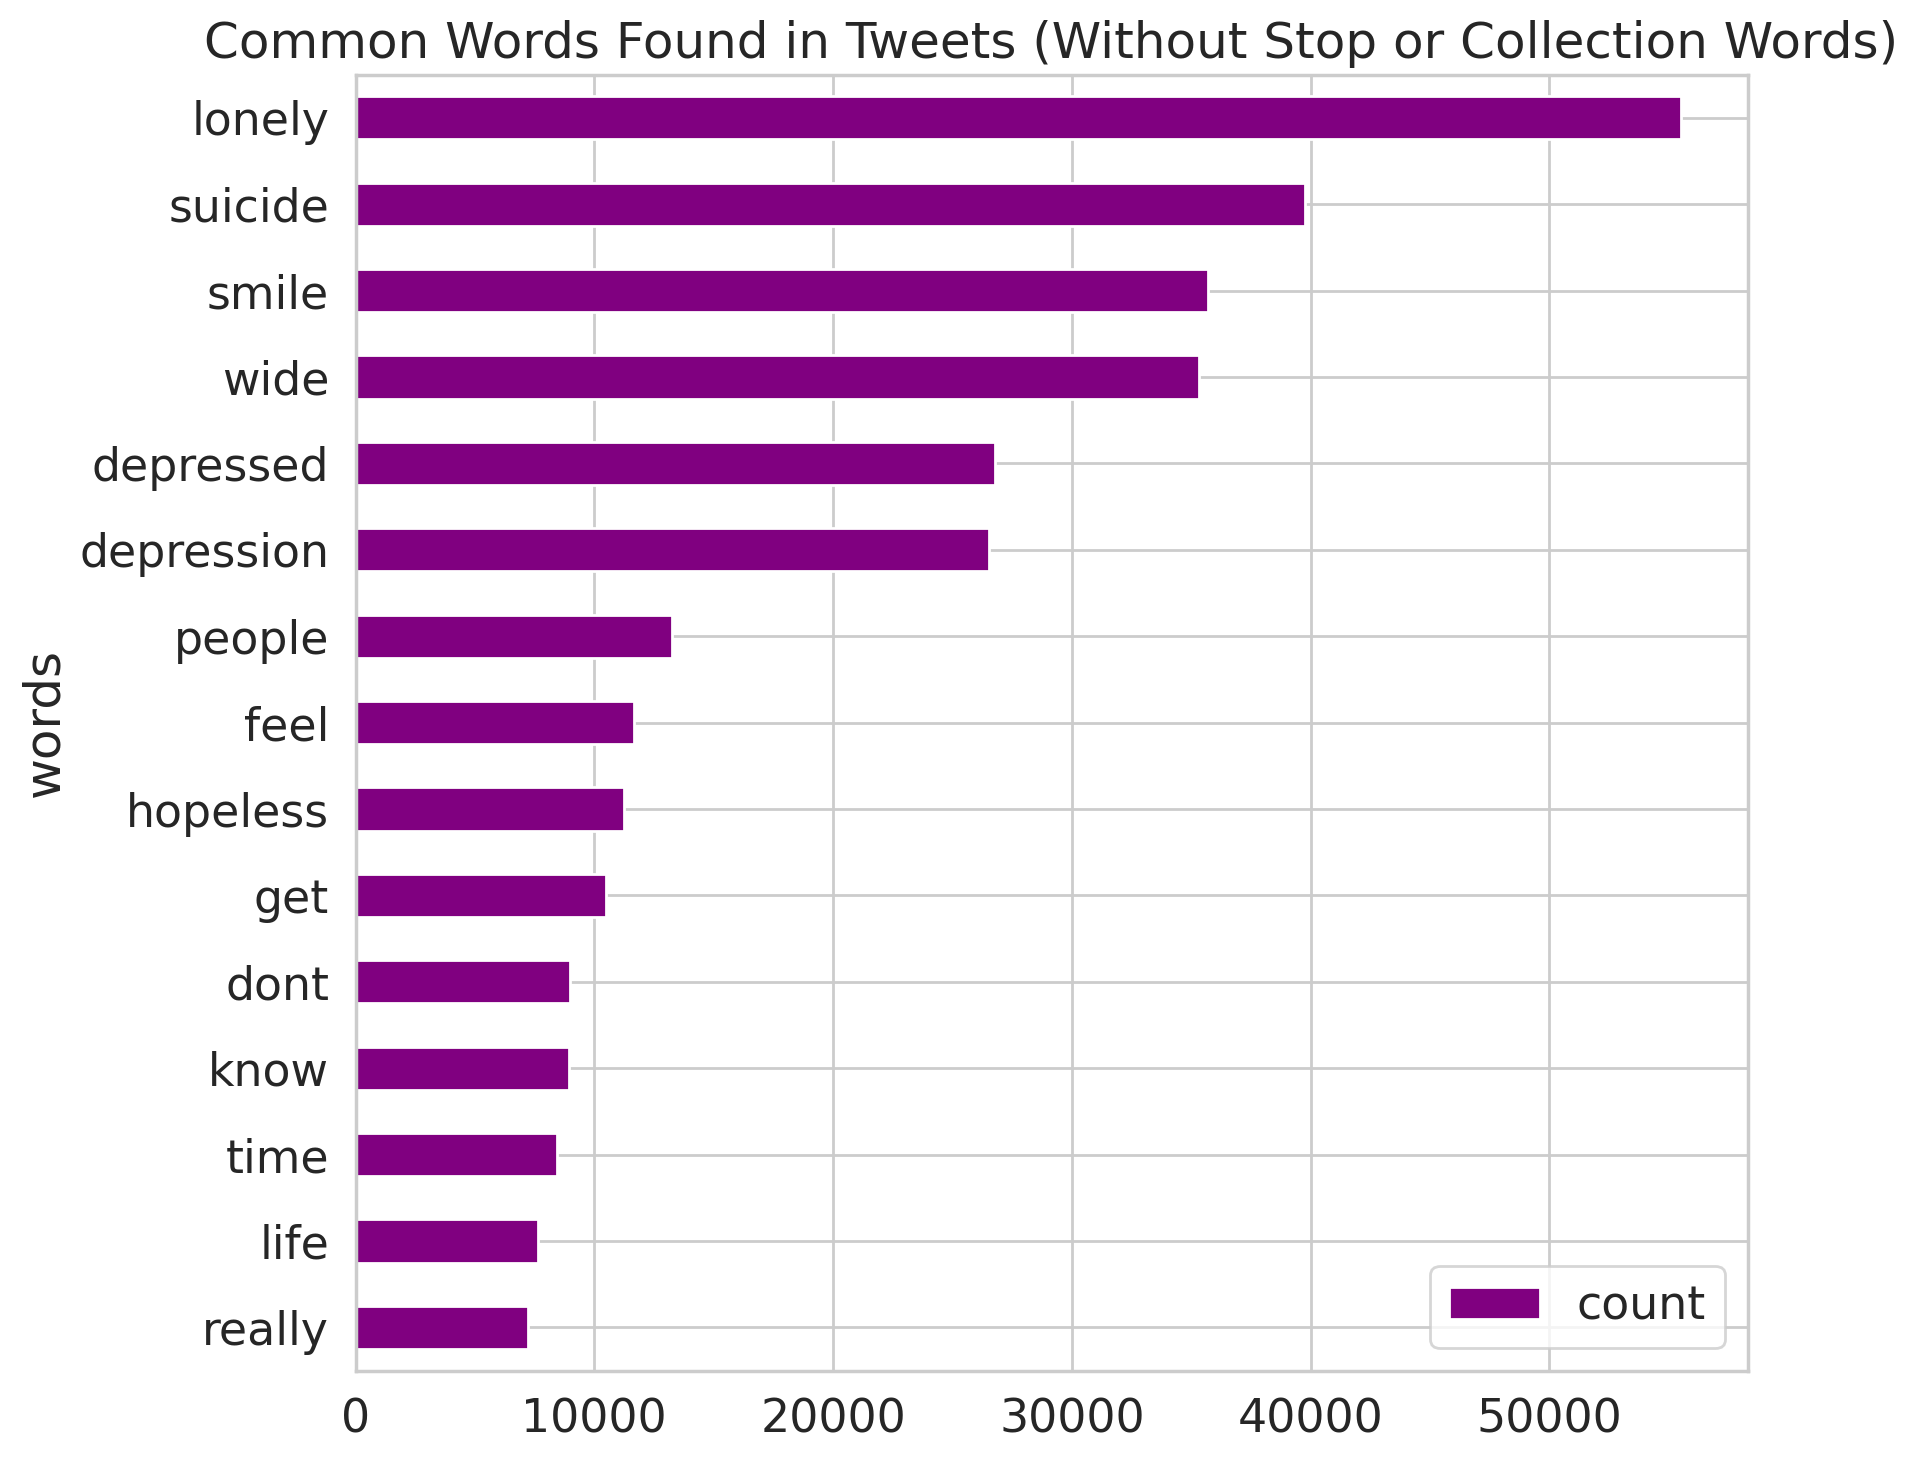

In [54]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

In [55]:
from nltk import bigrams

# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]

[('listen', 'sorry'),
 ('sorry', 'elder'),
 ('elder', 'spirits'),
 ('spirits', 'gone'),
 ('gone', 'didnt'),
 ('didnt', 'make'),
 ('make', 'sense')]

In [56]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('smile', 'wide'), 35208),
 (('afraid', 'loneliness'), 4641),
 (('feel', 'lonely'), 3547),
 (('suicide', 'squad'), 2769),
 (('commit', 'suicide'), 2642),
 (('committed', 'suicide'), 1692),
 (('feeling', 'lonely'), 1651),
 (('mental', 'health'), 1482),
 (('hopeless', 'romantic'), 1347),
 (('anxiety', 'depression'), 1346),
 (('suicide', 'bomber'), 1320),
 (('depression', 'anxiety'), 1295),
 (('sad', 'lonely'), 1190),
 (('social', 'media'), 1067),
 (('get', 'lonely'), 924),
 (('dont', 'know'), 864),
 (('suicide', 'prevention'), 843),
 (('committing', 'suicide'), 841),
 (('seasonal', 'depression'), 820),
 (('get', 'depressed'), 810)]

In [57]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(smile, wide)",35208
1,"(afraid, loneliness)",4641
2,"(feel, lonely)",3547
3,"(suicide, squad)",2769
4,"(commit, suicide)",2642
5,"(committed, suicide)",1692
6,"(feeling, lonely)",1651
7,"(mental, health)",1482
8,"(hopeless, romantic)",1347
9,"(anxiety, depression)",1346


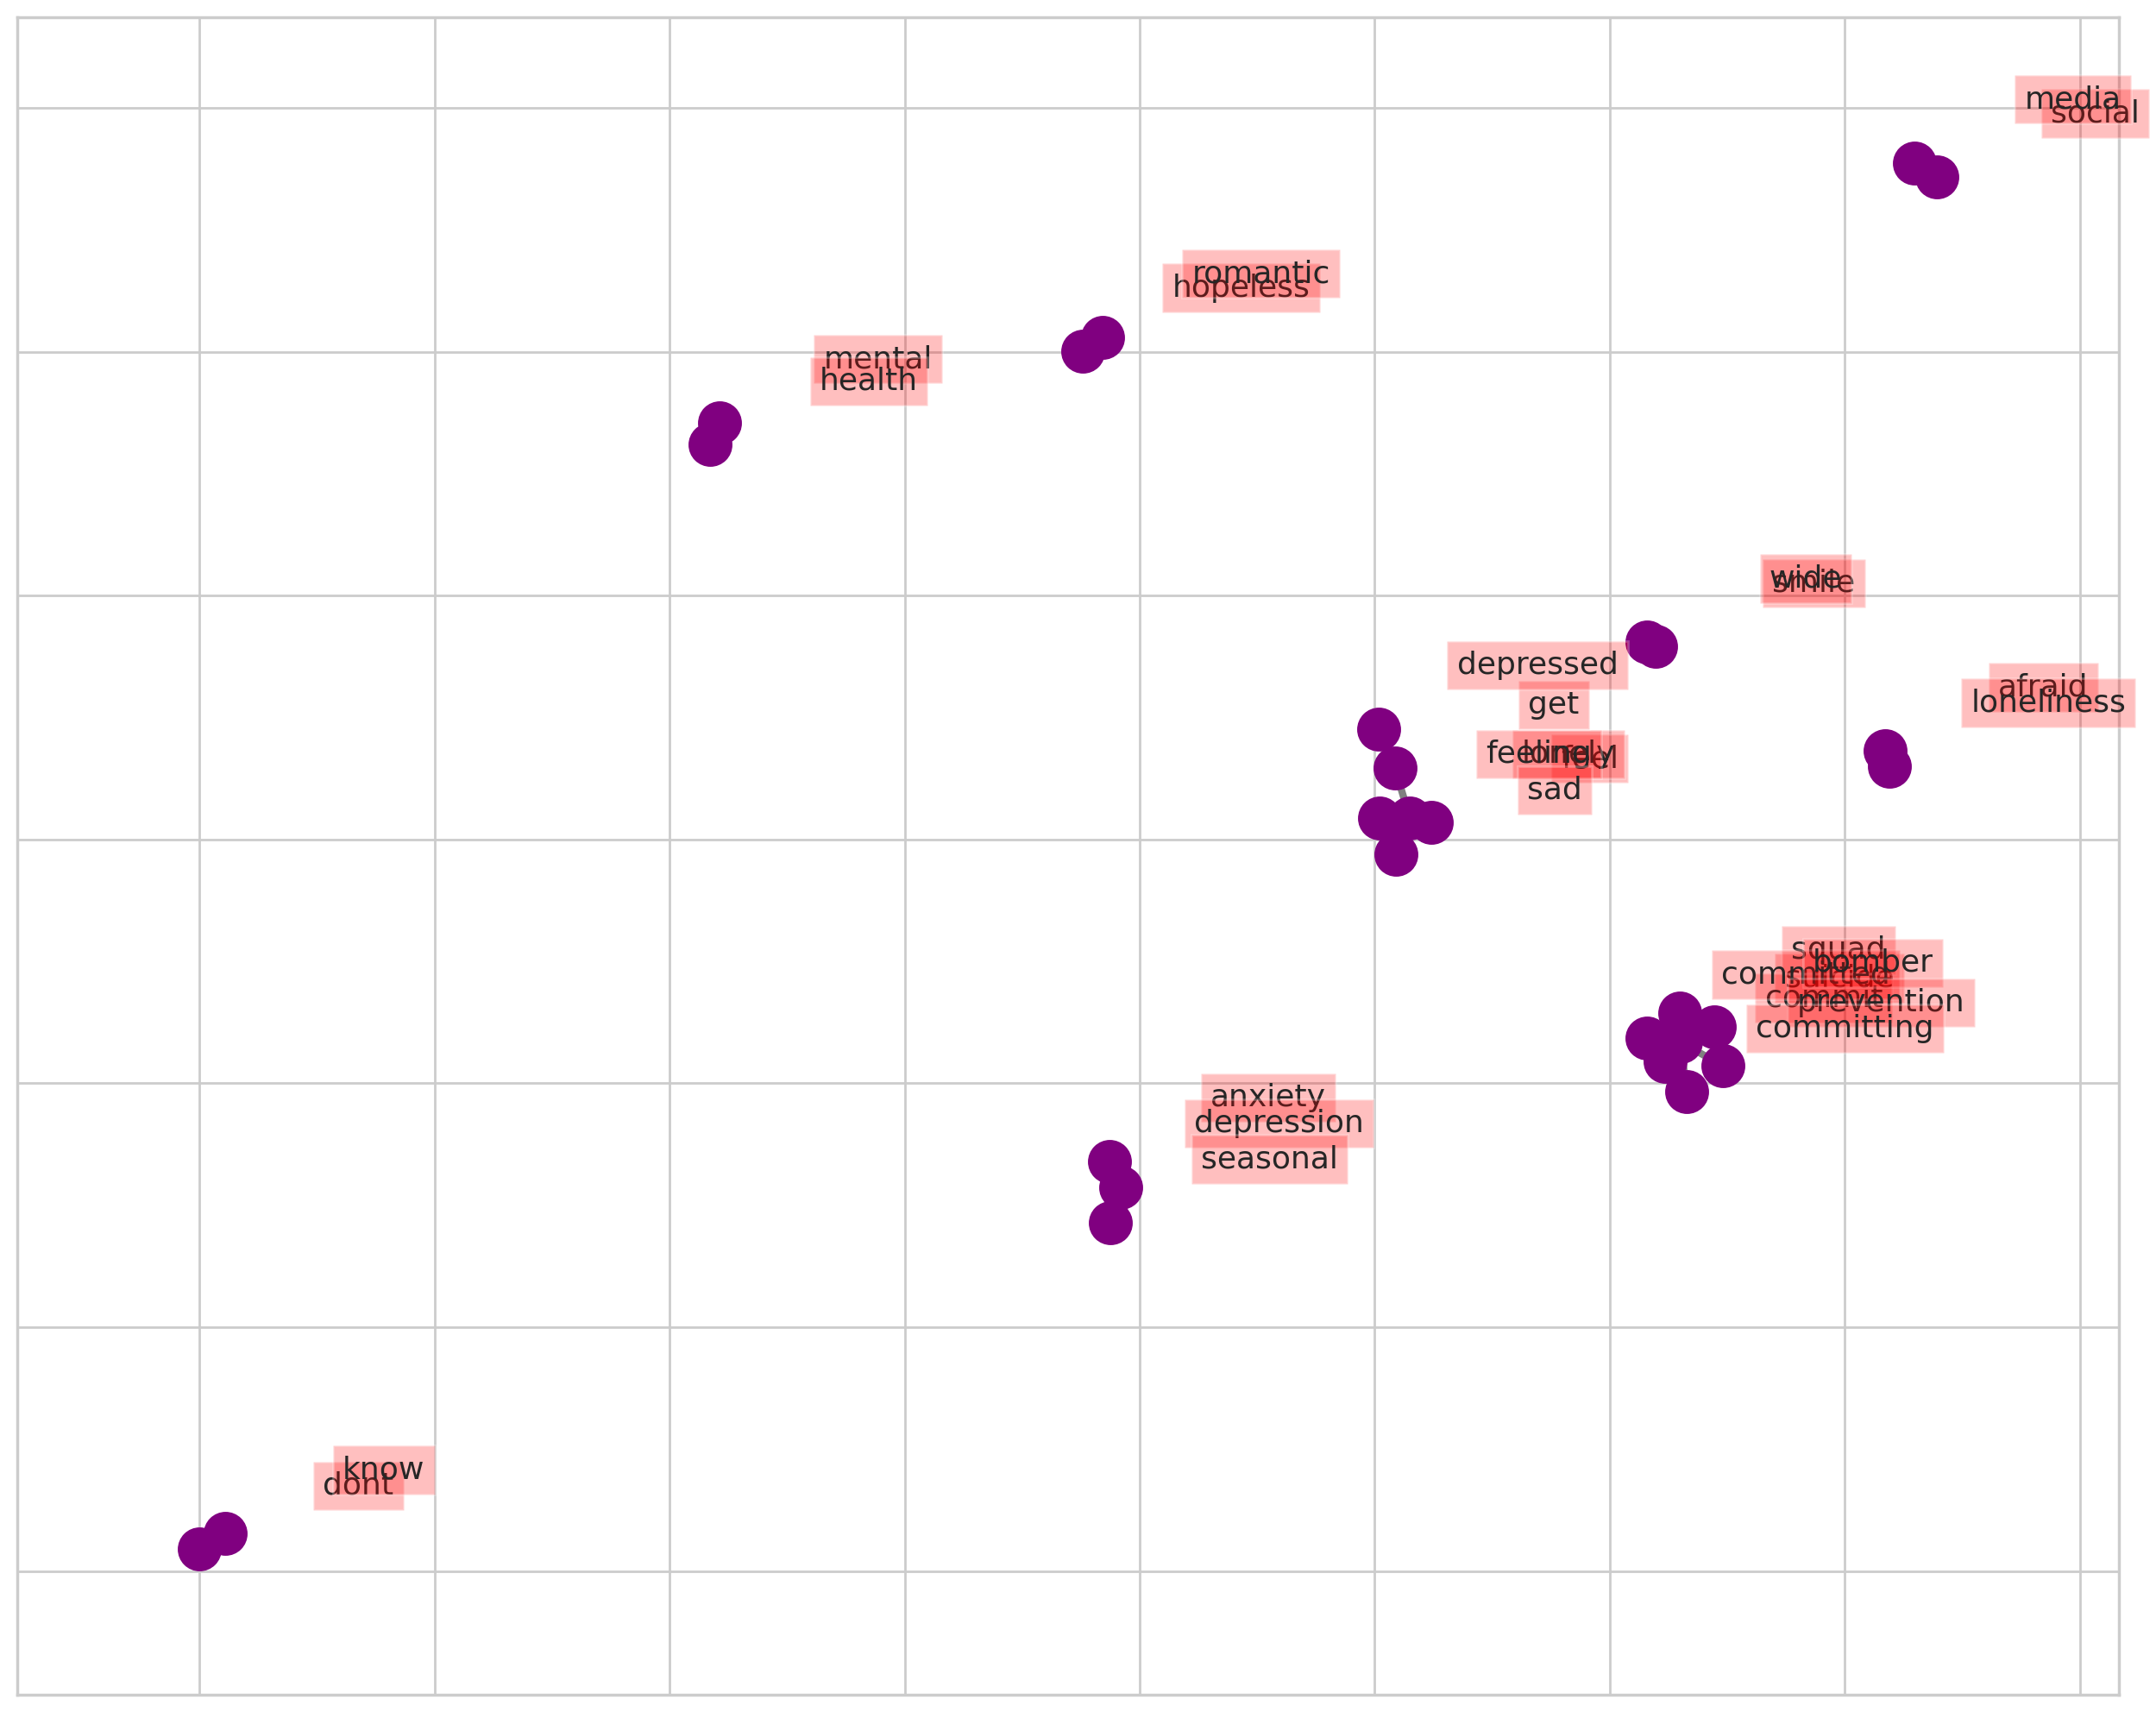

In [58]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(14, 12))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [59]:
train = pd.read_csv('depressive_unigram_tweets_final.csv')

In [60]:
train.head()

,Unnamed: 0.1,id,time,tweet,hashtags,cashtags,Unnamed: 0
0,0,1151315262748205057,19:18:43,Listen!! IM SORRY!! With her elder spirits g...,[],[],NaN
1,1,1151315254615400448,19:18:41,Im so pissed and depressed at the same time,[],[],NaN
2,2,1151315222692429825,19:18:34,"I’m just a hot mess that’s stressed, depressed...",[],[],NaN
3,3,1151315218011549696,19:18:33,Chen's probably depressed too since she's no l...,[],[],NaN
4,4,1151315209413386240,19:18:30,"Do you like it when I shake it for ya, daddy? ...",[],[],NaN


In [61]:
train['word_count'] = train['tweet'].apply(lambda x: int(len(str(x).split(" "))))
train[['tweet','word_count']].head()

,tweet,word_count
0,Listen!! IM SORRY!! With her elder spirits g...,14
1,Im so pissed and depressed at the same time,9
2,"I’m just a hot mess that’s stressed, depressed...",25
3,Chen's probably depressed too since she's no l...,10
4,"Do you like it when I shake it for ya, daddy? ...",26


In [62]:
train['char_count'] = train['tweet'].str.len() ## this also includes spaces
train[['tweet','char_count']].head()

,tweet,char_count
0,Listen!! IM SORRY!! With her elder spirits g...,72.0
1,Im so pissed and depressed at the same time,43.0
2,"I’m just a hot mess that’s stressed, depressed...",143.0
3,Chen's probably depressed too since she's no l...,72.0
4,"Do you like it when I shake it for ya, daddy? ...",115.0


In [63]:
char_count = train['tweet'].str.len() ## this also includes spaces
char_count.head()

0     72.0
1     43.0
2    143.0
3     72.0
4    115.0
Name: tweet, dtype: float64

In [64]:
char_count.mean()

40.01836167525956

In [65]:
char_count.median()

28.0

In [66]:
char_count.mode()

0    27.0
Name: tweet, dtype: float64

In [67]:
word_counts = train['tweet'].apply(lambda x: int(len(str(x).split(" "))))


In [68]:
word_counts.head()

0    14
1     9
2    25
3    10
4    26
Name: tweet, dtype: int64

In [69]:
word_counts.mean()

4.832413382336392

In [70]:
word_counts.median()

4.0

In [71]:
word_counts.mode()

0    1
Name: tweet, dtype: int64

(0.0, 300.0)

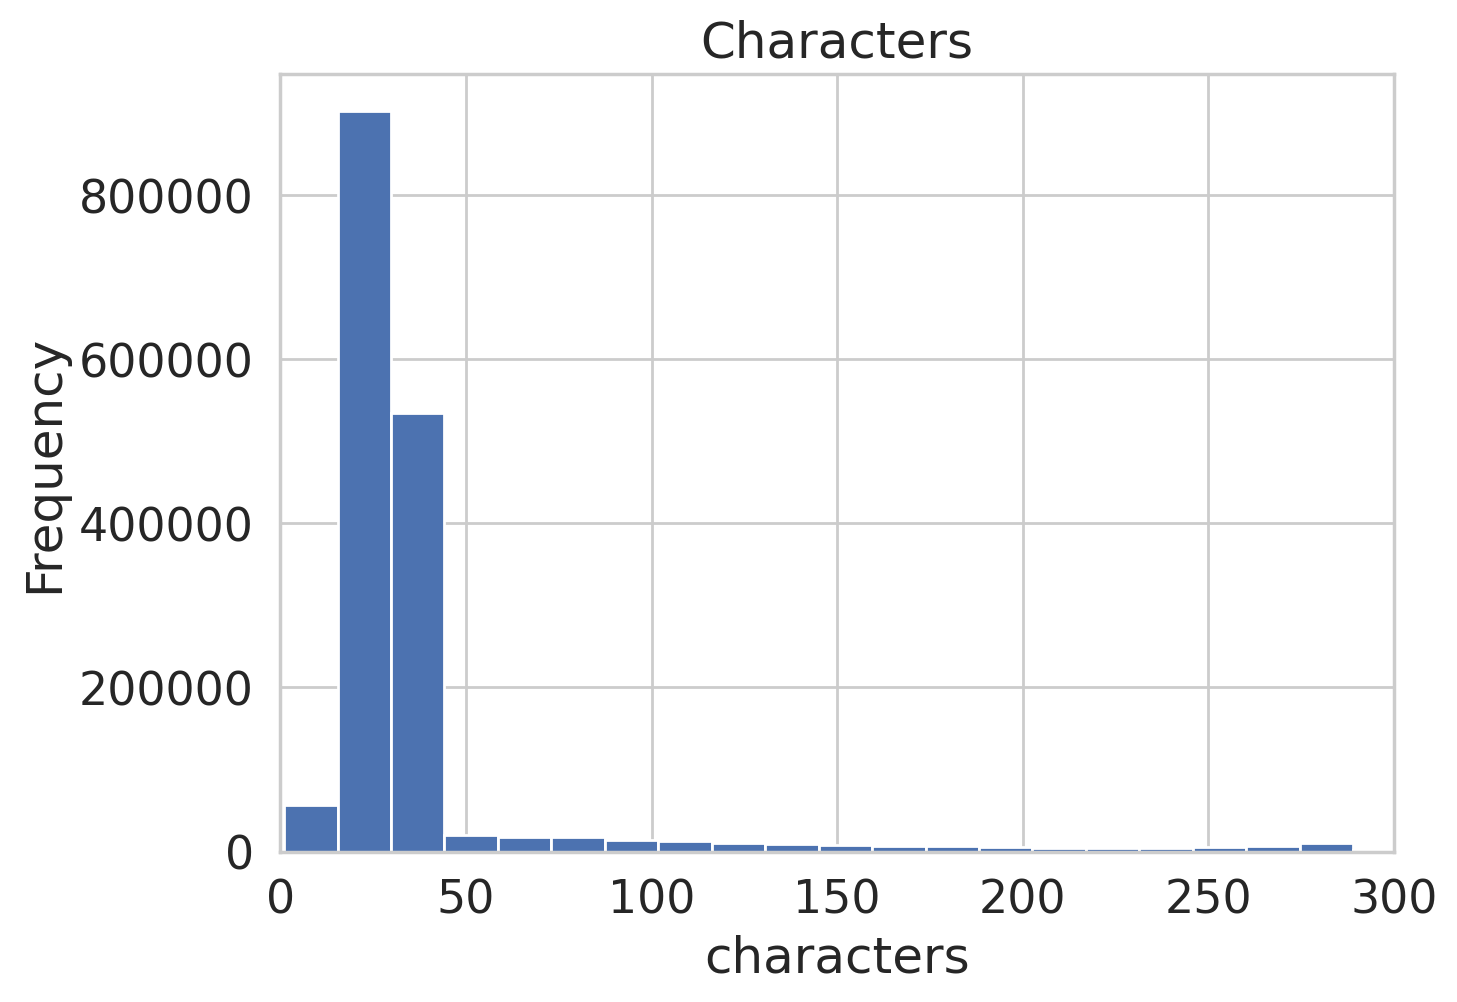

In [72]:
# Plot Histogram on x
x = char_count
plt.hist(x, bins=50)
plt.gca().set(title='Characters', ylabel='Frequency', xlabel='characters');
plt.xlim(0, 300)

(0.0, 100.0)

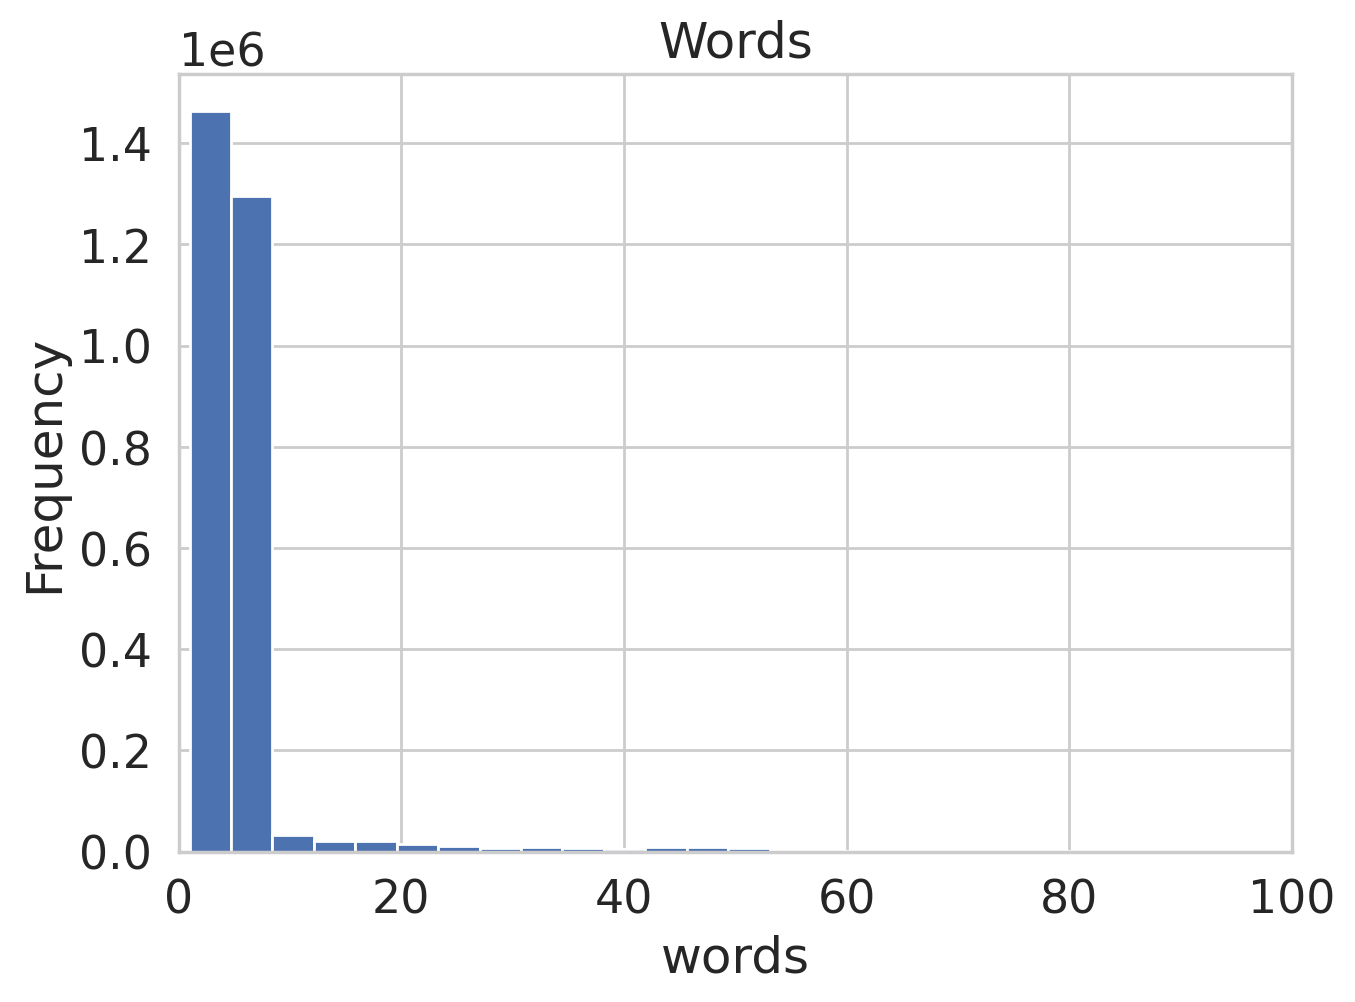

In [73]:
# Plot Histogram on x
x = word_counts
plt.hist(x, bins=50)
plt.gca().set(title='Words', ylabel='Frequency', xlabel='words');
plt.xlim(0, 100)